In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")
import io


# Introduction to the Project

   Churn rate is an important business metric when it comes to customer behavior. It’s defined as the percentage of customers who cancel their subscription or service with a company. It almost always costs less to retain customers than it does to acquire new customers, leading business to focus on retention and try to avoid churn. While churn is important in any customer-business service, it can be useful for Telecom companies to have the data on hand to analyze. 

   For training the model, we have obtained IBM Sample data set for Telco churn. The data set consists of information of customer who left within the last month with column name as churn. Also, data consists of Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies. Furthermore, we have columns related to Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges. Demographic info about customers – gender, age range, and if they have partners and dependents. The main objective of the project is to train the model to predict the churns and to provide the business recommendations to retain the customers.
   
   Predicting the churn can help the business in variety of ways. It will help them to know the factors leading to customer churn. From the insights provided, the senior management can take measures to optimize their profits. Like for example, we can target specific customer demographics who are more likely to churn and provide them with special offers and discounts to retain them.

Sample size: 7043, 20 predictors, binary outcome variable - churn

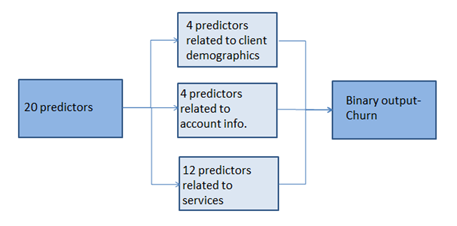


# Understanding our dataset

In [2]:
telcom = pd.read_csv('Telco_Customer_Churn.csv')
telcom.keys()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [3]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
telcom.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [5]:
# Drop rows with any empty cells 
telcom['TotalCharges'] = telcom["TotalCharges"].replace(" ",np.nan)


In [6]:
telcom= telcom.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [7]:
telcom.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [8]:
telcom.count() #now df has 7032 

customerID          7032
gender              7032
SeniorCitizen       7032
Partner             7032
Dependents          7032
tenure              7032
PhoneService        7032
MultipleLines       7032
InternetService     7032
OnlineSecurity      7032
OnlineBackup        7032
DeviceProtection    7032
TechSupport         7032
StreamingTV         7032
StreamingMovies     7032
Contract            7032
PaperlessBilling    7032
PaymentMethod       7032
MonthlyCharges      7032
TotalCharges        7032
Churn               7032
dtype: int64

In [4]:
telcom = telcom[telcom["TotalCharges"].notnull()]
telcom = telcom.reset_index()[telcom.columns]
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
#change totalcharge datatype from object to float
telcom["TotalCharges"] = telcom["TotalCharges"].astype(float)
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null object
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(1), o

In [6]:
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    telcom[i]  = telcom[i].replace({'No internet service' : 'No'})
    
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
telcom["SeniorCitizen"] = telcom["SeniorCitizen"].replace({1:"Yes",0:"No"})
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Feature Engineering

In [14]:
#Tenure to categorical column
def tenure_lab(telcom) :
    
    if telcom["tenure"] <= 12 :
        return "Tenure_0_12"
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return "Tenure_12_24"
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 36) :
        return "Tenure_24_36"
    elif (telcom["tenure"] > 36) & (telcom["tenure"] <= 48) :
        return "Tenure_36_48"
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return "Tenure_48_60"
    elif (telcom["tenure"] > 60) :
        return "Tenure_gt_60"
    
telcom["tenure_group"] = telcom.apply(lambda telcom:tenure_lab(telcom),
                                      axis = 1)

telcom = telcom.drop(['tenure'], axis=1) #now delete orginal tenure column

telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Tenure_0_12
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Tenure_24_36
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure_0_12
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Tenure_36_48
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Tenure_0_12


In [20]:
#delete customerID column becasue it won't be used in machine learning models
telcom = telcom.drop(['customerID'], axis=1) #now delete orginal tenure column

In [6]:
telcom.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Tenure_0_12
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Tenure_24_36
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure_0_12
3,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Tenure_36_48
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Tenure_0_12


In [3]:
telcom = pd.read_csv('Processed Telco File for Tableau.csv')

In [13]:
telcom.to_csv('Processed Telco File for Tableau_temp.csv',index=False)

In [2]:
telcom = pd.read_csv('Processed Telco File for Tableau_temp.csv')

# Insights and Recommendations 

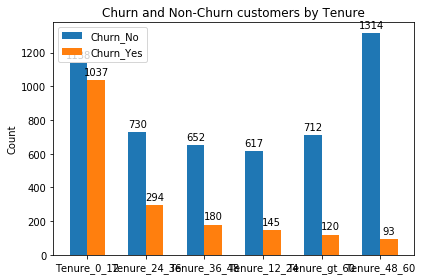

Insight: Customers with tenure less than 12 months are more likely to churn.
Recommendation: More attention should be given to customers with tenure more than 12 months as they have been loyal to the company and efforts should be exerted to retain them.


In [86]:
#Insight 1:

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
labels = telcom["tenure_group"].unique().tolist()
nc = telcom[telcom["Churn"]=='No'].groupby(["tenure_group"])['Churn'].count()
c = telcom[telcom["Churn"]=='Yes'].groupby(["tenure_group"])['Churn'].count()

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, nc, width, label='Churn_No')
rects2 = ax.bar(x + width/2, c, width, label='Churn_Yes')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Churn and Non-Churn customers by Tenure')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

print("Insight: Customers with tenure less than 12 months are more likely to churn.\nRecommendation: More attention should be given to customers with tenure more than 12 months as they have been loyal to the company and efforts should be exerted to retain them.")



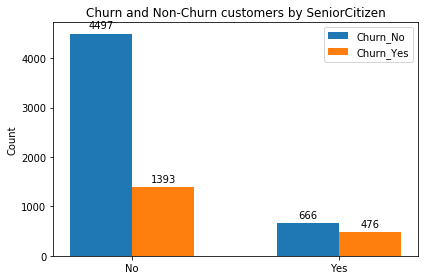

Insight: Senior Citizens are only 16% (1142/(5890+1142)*100) of total customers, but they have a much higher churn rate: 42% (476/1142*100) against 23% (1393/5890*100) for non-senior customers. 
Recommendation: Company should gather more information to analyze the behavior of churned customers that comes under senior citizen category. And based on the analysis result, provide offers and discounts tailored towards their need.


In [92]:
#Insight 2:

labels = telcom["SeniorCitizen"].unique().tolist()
nc = telcom[telcom["Churn"]=='No'].groupby(["SeniorCitizen"])['Churn'].count()
c = telcom[telcom["Churn"]=='Yes'].groupby(["SeniorCitizen"])['Churn'].count()

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, nc, width, label='Churn_No')
rects2 = ax.bar(x + width/2, c, width, label='Churn_Yes')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Churn and Non-Churn customers by SeniorCitizen')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
print("Insight: Senior Citizens are only 16% (1142/(5890+1142)*100) of total customers, but they have a much higher churn rate: 42% (476/1142*100) against 23% (1393/5890*100) for non-senior customers. \nRecommendation: Company should gather more information to analyze the behavior of churned customers that comes under senior citizen category. And based on the analysis result, provide offers and discounts tailored towards their need.")


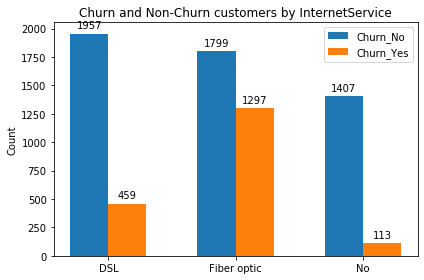

Insight: Customers without internet have a very low churn rate. Customers with Fiber Optic service are more probable to churn than those with DSL connection. 
Recommendation: Fiber optic service is a major contributor for churn probably due to poor connectivity issues or presence of superior competitors. Hence, the fiber optic internet connectivity should be vastly improved in order to arrest customer churn.


In [93]:
#Insight 3:

labels = telcom["InternetService"].unique().tolist()
nc = telcom[telcom["Churn"]=='No'].groupby(["InternetService"])['Churn'].count()
c = telcom[telcom["Churn"]=='Yes'].groupby(["InternetService"])['Churn'].count()

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, nc, width, label='Churn_No')
rects2 = ax.bar(x + width/2, c, width, label='Churn_Yes')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Churn and Non-Churn customers by InternetService')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
print("Insight: Customers without internet have a very low churn rate. Customers with Fiber Optic service are more probable to churn than those with DSL connection. \nRecommendation: Fiber optic service is a major contributor for churn probably due to poor connectivity issues or presence of superior competitors. Hence, the fiber optic internet connectivity should be vastly improved in order to arrest customer churn.")


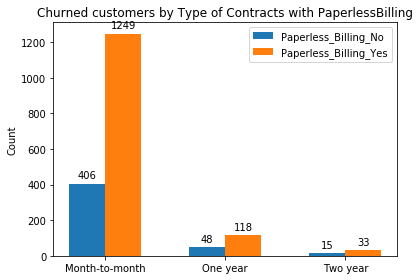

Insight: Customers who churned had Month-to-month contract with Paperless Billing enabled. 
Recommendation: More offers and discounts should be provided to customers churning in first six months having month to month contract with Paperless Billing enabled in order to retain them as customers. Also, people should be given the option to transition to other billing options/payment method if they are facing difficulty in receiving paperless bills.


In [96]:
#Insight 4:

labels = telcom["Contract"].unique().tolist()
nc = telcom[(telcom["Churn"]=='Yes') & (telcom["PaperlessBilling"]=='No')].groupby(["Contract"])['Churn'].count()
c = telcom[(telcom["Churn"]=='Yes') & (telcom["PaperlessBilling"]=='Yes')].groupby(["Contract"])['Churn'].count()

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, nc, width, label='Paperless_Billing_No')
rects2 = ax.bar(x + width/2, c, width, label='Paperless_Billing_Yes')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Churned customers by Type of Contracts with PaperlessBilling')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
print("Insight: Customers who churned had Month-to-month contract with Paperless Billing enabled. \nRecommendation: More offers and discounts should be provided to customers churning in first six months having month to month contract with Paperless Billing enabled in order to retain them as customers. Also, people should be given the option to transition to other billing options/payment method if they are facing difficulty in receiving paperless bills.")


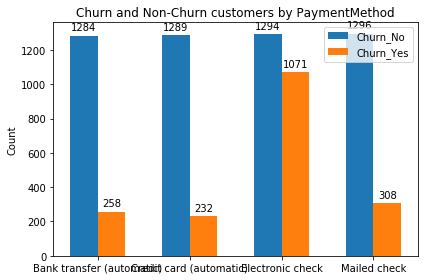

Insight: The preferred payment method is Electronic check with around 34% of customers. However, this method has a very high churn rate. 
Recommendation: Electronic check payment option should be properly evaluated, and its user interface and user experience should be improved.


In [103]:
#Insight 5:

labels = ['Bank transfer (automatic)','Credit card (automatic)','Electronic check','Mailed check']
nc = telcom[telcom["Churn"]=='No'].groupby(["PaymentMethod"])['Churn'].count()
c = telcom[telcom["Churn"]=='Yes'].groupby(["PaymentMethod"])['Churn'].count()

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, nc, width, label='Churn_No')
rects2 = ax.bar(x + width/2, c, width, label='Churn_Yes')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Churn and Non-Churn customers by PaymentMethod')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
print("Insight: The preferred payment method is Electronic check with around 34% of customers. However, this method has a very high churn rate. \nRecommendation: Electronic check payment option should be properly evaluated, and its user interface and user experience should be improved.")


# Data pre-processing 

In [104]:
#get the count of churn and non churn customers
telcom.groupby(["Churn"])['Churn'].count() #Churn= 5163 & Non churn = 1869

Churn
No     5163
Yes    1869
Name: Churn, dtype: int64

In [6]:
#replace 'No internet service' to No for the following columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    telcom[i]  = telcom[i].replace({'No internet service' : 'No'})

In [10]:
#finding correaltion between Monthly charges and Total charges. Because we only have two numeric variables in our dataset.
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(telcom['MonthlyCharges'], telcom['TotalCharges'])
print('Pearsons correlation: %.3f' % corr)
#it doesn't look like there is high correaltion hence will use both the variables.

Pearsons correlation: 0.651


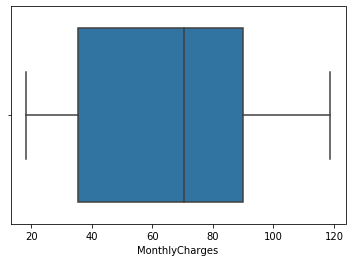

In [11]:
#check for outliers in the dataset
import seaborn as sns
sns.boxplot(x=telcom['MonthlyCharges'])

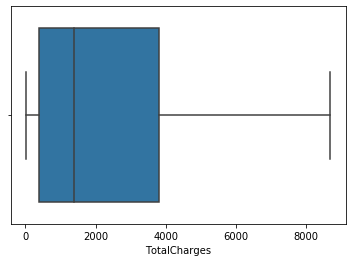

In [22]:
sns.boxplot(x=telcom['TotalCharges'])
#we don't need to deal with outlers because there is not outliers in numerical columns 

In [23]:
#Handling Categorical Data using one-hot encoding 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

cat_vars=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','tenure_group']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(telcom[var], prefix=var)
    telcom1=telcom.join(cat_list)
    telcom=telcom1
    
cat_vars=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','tenure_group']
telcom_vars=telcom.columns.values.tolist()
to_keep=[i for i in telcom_vars if i not in cat_vars]

In [24]:
telcom_final=telcom[to_keep]
#data_final.columns.values

In [26]:
telcom_final.columns.values

array(['MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Female',
       'gender_Male', 'SeniorCitizen_No', 'SeniorCitizen_Yes',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No',
       'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenur

In [28]:
#Scaling Numerical columns
telcom_final_copy = telcom_final.copy()
num_cols = ['MonthlyCharges', 'TotalCharges']

std = StandardScaler()
scaled = std.fit_transform(telcom_final[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns

telcom_final = telcom_final.drop(columns = num_cols,axis = 1)
telcom_final = telcom_final.merge(scaled,left_index=True,right_index=True,how = "left")

telcom_final.head()

,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0_12,tenure_group_Tenure_12_24,tenure_group_Tenure_24_36,tenure_group_Tenure_36_48,tenure_group_Tenure_48_60,tenure_group_Tenure_gt_60,MonthlyCharges,TotalCharges
0,No,1,0,1,0,0,1,1,0,1,...,1,0,1,0,0,0,0,0,-1.161694,-0.994194
1,No,0,1,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,-0.260878,-0.173740
2,Yes,0,1,1,0,1,0,1,0,0,...,0,1,1,0,0,0,0,0,-0.363923,-0.959649
3,No,0,1,1,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,-0.747850,-0.195248
4,Yes,1,0,1,0,1,0,1,0,0,...,1,0,1,0,0,0,0,0,0.196178,-0.940457


In [30]:
telcom_final.to_csv('Processed Telco File for ML.csv',index=False)

In [2]:
telcom_final = pd.read_csv('Processed Telco File for ML_1.csv')

In [9]:
telcom_final["Churn"] = telcom_final["Churn"].replace({"Yes":1,"No":0})

In [3]:
telcom_final.head()

,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0_12,tenure_group_Tenure_12_24,tenure_group_Tenure_24_36,tenure_group_Tenure_36_48,tenure_group_Tenure_48_60,tenure_group_Tenure_gt_60,MonthlyCharges,TotalCharges
0,0,1,0,1,0,0,1,1,0,1,...,1,0,1,0,0,0,0,0,-1.161694,-0.994194
1,0,0,1,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,-0.260878,-0.173740
2,1,0,1,1,0,1,0,1,0,0,...,0,1,1,0,0,0,0,0,-0.363923,-0.959649
3,0,0,1,1,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,-0.747850,-0.195248
4,1,1,0,1,0,1,0,1,0,0,...,1,0,1,0,0,0,0,0,0.196178,-0.940457


In [11]:
telcom_final.to_csv('Processed Telco File for ML_1.csv',index=False)

In [113]:
print ("Rows     : " ,telcom_final.shape[0])
print ("Columns  : " ,telcom_final.shape[1])

Rows     :  7032
Columns  :  46


# Model Building

In [4]:
# create training and testing vars
X = telcom_final.loc[:, telcom_final.columns != 'Churn']
y = telcom_final.loc[:, telcom_final.columns == 'Churn']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5274, 45) (5274, 1)
(1758, 45) (1758, 1)


# Baseline modiel - LogisticRegression

In [110]:
#Baseline modiel - LogisticRegression
from sklearn.linear_model import LogisticRegression
LogReg_model = LogisticRegression()
LogReg_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, LogReg_model.predict(X_test)))

[[1200  111]
 [ 222  225]]


In [16]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
print(classification_report(y_test, LogReg_model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1311
           1       0.67      0.50      0.57       447

    accuracy                           0.81      1758
   macro avg       0.76      0.71      0.73      1758
weighted avg       0.80      0.81      0.80      1758



In [17]:
LogReg_model.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [19]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, LogReg_model.predict(X_test))

0.7093437562391535

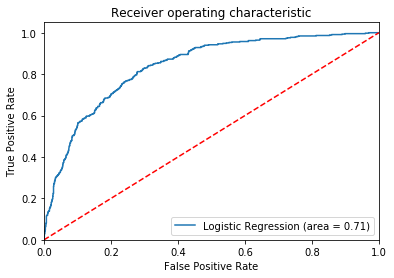

In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
LogReg_model_roc_auc = roc_auc_score(y_test, LogReg_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LogReg_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % LogReg_model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [31]:
print(X_train.shape, y_train.shape)
#print(X_test.shape, y_test.shape)

(5274, 45) (5274, 1)


In [7]:
y_train['Churn'].value_counts() # count before SMOTE

0    3852
1    1422
Name: Churn, dtype: int64

In [9]:
pip install -U imbalanced-learn

  Using cached https://files.pythonhosted.org/packages/c8/73/36a13185c2acff44d601dc6107b5347e075561a49e15ddd4e69988414c3e/imbalanced_learn-0.6.2-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [6]:
# LogisticRegression with SMOTE (Balanced training dataset)

#oversampling minority class in training dataset using smote
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state = 0)
X_train_os,y_train_os = os.fit_sample(X_train,y_train)

In [7]:
y_train_os['Churn'].value_counts() #count after SMOTE

1    3852
0    3852
Name: Churn, dtype: int64

In [8]:
X_train_os.shape

(7704, 45)

In [121]:
y_train_os.shape

(7704, 1)

# LogisticRegression with SMOTE 

In [17]:
#LogisticRegression with SMOTE 
from sklearn.linear_model import LogisticRegression
LogReg_smote = LogisticRegression()
LogReg_smote.fit(X_train_os, y_train_os)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, LogReg_smote.predict(X_test)))

[[1148  163]
 [ 188  259]]


In [23]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
print(classification_report(y_test, LogReg_smote.predict(X_test)))


              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1311
           1       0.61      0.58      0.60       447

    accuracy                           0.80      1758
   macro avg       0.74      0.73      0.73      1758
weighted avg       0.80      0.80      0.80      1758



In [20]:
LogReg_smote.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [21]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, LogReg_smote.predict(X_test))

0.7275428869810943

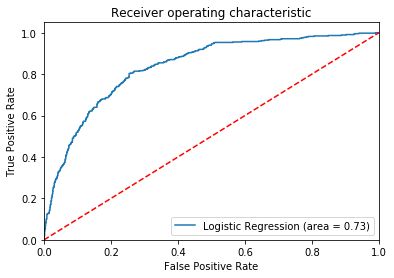

In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
LogReg_smote_roc_auc = roc_auc_score(y_test, LogReg_smote.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LogReg_smote.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % LogReg_smote_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# RandomForest without SMOTE

In [122]:
#RandomForest without SMOTE
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=25, random_state=12)
rf_model.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [123]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, rf_model.predict(X_test)))

[[1159  152]
 [ 237  210]]


In [124]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
print(classification_report(y_test, rf_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1311
           1       0.58      0.47      0.52       447

    accuracy                           0.78      1758
   macro avg       0.71      0.68      0.69      1758
weighted avg       0.77      0.78      0.77      1758



In [125]:
rf_model.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [126]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, rf_model.predict(X_test))

0.6769283143663067

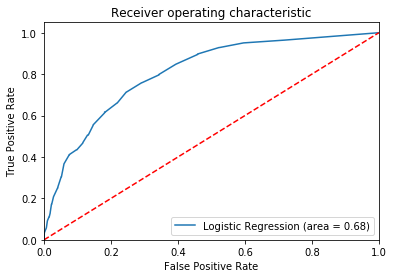

In [31]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_model_roc_auc = roc_auc_score(y_test, rf_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % rf_model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# RandomForest with SMOTE

In [32]:
#RandomForest with SMOTE
from sklearn.ensemble import RandomForestClassifier
rf_model_smote = RandomForestClassifier(n_estimators=25, random_state=12)
rf_model_smote.fit(X_train_os,y_train_os)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, rf_model_smote.predict(X_test)))

[[1104  207]
 [ 201  246]]


In [34]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
print(classification_report(y_test, rf_model_smote.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1311
           1       0.54      0.55      0.55       447

    accuracy                           0.77      1758
   macro avg       0.69      0.70      0.70      1758
weighted avg       0.77      0.77      0.77      1758



In [35]:
rf_model_smote.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [36]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, rf_model_smote.predict(X_test))

0.6962204168138466

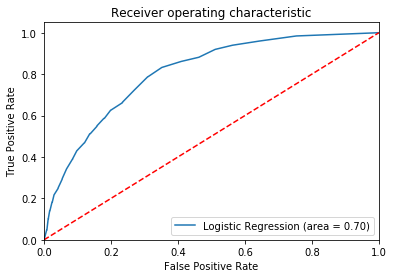

In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_smote_roc_auc = roc_auc_score(y_test, rf_model_smote.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_model_smote.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % rf_smote_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Plot feature importance

In [45]:
col_names = ['gender_Female', 'gender_Male', 'SeniorCitizen_No',
       'SeniorCitizen_Yes', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure_group_Tenure_0_12', 'tenure_group_Tenure_12_24',
       'tenure_group_Tenure_24_36', 'tenure_group_Tenure_36_48',
       'tenure_group_Tenure_48_60', 'tenure_group_Tenure_gt_60',
       'MonthlyCharges', 'TotalCharges']

In [47]:
import pandas as pd
feature_imp = pd.Series(rf_model_smote.feature_importances_,index=col_names).sort_values(ascending=False)
feature_imp

TotalCharges                               0.136816
MonthlyCharges                             0.120850
Contract_Month-to-month                    0.065516
Contract_Two year                          0.048095
tenure_group_Tenure_0_12                   0.034874
InternetService_Fiber optic                0.034288
PaymentMethod_Electronic check             0.030850
Contract_One year                          0.026622
OnlineSecurity_Yes                         0.023666
PaperlessBilling_No                        0.021984
InternetService_No                         0.021044
PaymentMethod_Credit card (automatic)      0.020277
tenure_group_Tenure_gt_60                  0.019818
TechSupport_Yes                            0.019627
Dependents_Yes                             0.018770
gender_Female                              0.018218
SeniorCitizen_No                           0.016309
gender_Male                                0.015935
Partner_Yes                                0.015845
PaymentMetho

No handles with labels found to put in legend.


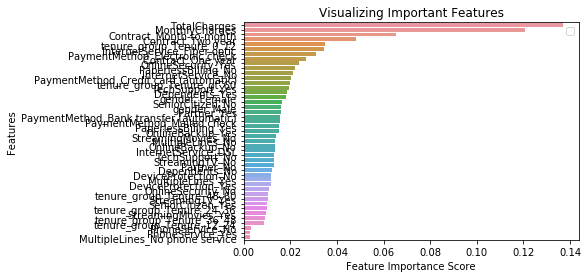

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# XGBOOST without SMOTE

In [12]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [13]:
import xgboost as xgb

In [18]:
# fit model on unbalanced training data 
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, xgb_model.predict(X_test)))

[[1159  152]
 [ 223  224]]


In [20]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
print(classification_report(y_test, xgb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1311
           1       0.60      0.50      0.54       447

    accuracy                           0.79      1758
   macro avg       0.72      0.69      0.70      1758
weighted avg       0.78      0.79      0.78      1758



In [21]:
xgb_model.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [22]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, xgb_model.predict(X_test))

0.6925882696235776

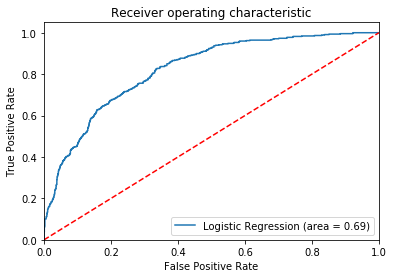

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
xgb_model_roc_auc = roc_auc_score(y_test, xgb_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % xgb_model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# XGBOOST with SMOTE

In [27]:
# fit model on balanced training data using SMOTE
from xgboost import XGBClassifier
xgb_model_smote = XGBClassifier()
xgb_model_smote.fit(X_train_os,y_train_os)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [28]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, xgb_model_smote.predict(X_test)))

[[1132  179]
 [ 195  252]]


In [29]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
print(classification_report(y_test, xgb_model_smote.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1311
           1       0.58      0.56      0.57       447

    accuracy                           0.79      1758
   macro avg       0.72      0.71      0.72      1758
weighted avg       0.78      0.79      0.79      1758



In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, xgb_model_smote.predict(X_test))

0.7136106973005903

# SVM without SMOTE

In [9]:
#SVM without grid search
from sklearn.svm import SVC

svm_model = SVC(kernel= 'linear',C=1.0,random_state=0)
svm_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, svm_model.predict(X_test)))

[[1206  105]
 [ 250  197]]


In [33]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
print(classification_report(y_test, svm_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1311
           1       0.65      0.44      0.53       447

    accuracy                           0.80      1758
   macro avg       0.74      0.68      0.70      1758
weighted avg       0.78      0.80      0.78      1758



In [34]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, svm_model.predict(X_test))

0.680312175244063

# SVM with SMOTE

In [12]:
#SVM without grid search
from sklearn.svm import SVC

svm_model_smote = SVC(kernel= 'rbf',C=1.0,random_state=0)
svm_model_smote.fit(X_train_os, y_train_os)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [40]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, svm_model_smote.predict(X_test)))

[[1157  154]
 [ 186  261]]


In [41]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
print(classification_report(y_test, svm_model_smote.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1311
           1       0.63      0.58      0.61       447

    accuracy                           0.81      1758
   macro avg       0.75      0.73      0.74      1758
weighted avg       0.80      0.81      0.80      1758



In [42]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, svm_model_smote.predict(X_test))

0.733212517725595

# SVM with SMOTE (Parameter tuning using Grid search)

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
param_grid = {'C': [0.1,1,10], 'gamma': [1,0.1,0.01],'kernel': ['rbf', 'sigmoid']}

In [12]:
grid = GridSearchCV(SVC(),param_grid,cv=5,verbose=2)
grid.fit(X_train_os,y_train_os)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   2.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   2.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   2.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   2.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   2.7s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   2.6s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   2.3s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   2.7s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] .

[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   1.4s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   3.3s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   3.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   3.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   3.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   3.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV] .................... C=10, gamma=1, kernel=sigmoid, total=   2.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  2.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [13]:
print(grid.best_estimator_) #C=1, kernel='rbf', gamma=0.1

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [14]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, grid.predict(X_test)))

[[1151  160]
 [ 185  262]]


In [15]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
print(classification_report(y_test, grid.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1311
           1       0.62      0.59      0.60       447

    accuracy                           0.80      1758
   macro avg       0.74      0.73      0.74      1758
weighted avg       0.80      0.80      0.80      1758



In [16]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, grid.predict(X_test))

0.7320427564388063

# Neutral Network (Multi-layer Perceptron Classifer) without SMOTE

In [43]:
from sklearn.neural_network import MLPClassifier

In [44]:
mlp = MLPClassifier(hidden_layer_sizes=(30,))

In [45]:
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [46]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, mlp.predict(X_test)))

[[1195  116]
 [ 246  201]]


In [47]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
print(classification_report(y_test, mlp.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1311
           1       0.63      0.45      0.53       447

    accuracy                           0.79      1758
   macro avg       0.73      0.68      0.70      1758
weighted avg       0.78      0.79      0.78      1758



In [48]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, mlp.predict(X_test))

0.6805911773890518

# Neutral Network (Multi-layer Perceptron Classifer) with SMOTE

In [64]:
mlp_smote = MLPClassifier(hidden_layer_sizes=(30,))

In [65]:
mlp_smote.fit(X_train_os, y_train_os)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [66]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, mlp_smote.predict(X_test)))

[[1144  167]
 [ 200  247]]


In [67]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
print(classification_report(y_test, mlp_smote.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1311
           1       0.60      0.55      0.57       447

    accuracy                           0.79      1758
   macro avg       0.72      0.71      0.72      1758
weighted avg       0.79      0.79      0.79      1758



In [68]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, mlp_smote.predict(X_test))

0.7125945151761809

# Model Comparison and Best model selection 

In [22]:
d = {'Models': ['Baseline modiel - LogisticRegression','LogisticRegression with SMOTE','RandomForest without SMOTE','RandomForest with SMOTE','XGBOOST without SMOTE','XGBOOST with SMOTE','SVM without SMOTE','SVM with SMOTE','SVM with SMOTE (Parameter tuning using Grid search)','Neutral Network (Multi-layer Perceptron Classifer) without SMOTE','Neutral Network (Multi-layer Perceptron Classifer) with SMOTE'
], 'ROC': [0.709,0.727,0.677,0.696,0.692,0.713,0.68,0.733,0.732,0.68,0.712], 'Precision': [0.67,0.61,0.58,0.54,0.6,0.58,0.65,0.63,0.62,0.63,0.6
], 'Recall': [0.5,0.58,0.47,0.55,0.5,0.56,0.44,0.58,0.59,0.45,0.55]}
df = pd.DataFrame(data=d)
df.sort_values(by='Recall', ascending=False)

,Models,ROC,Precision,Recall
8,SVM with SMOTE (Parameter tuning using Grid se...,0.732,0.62,0.59
1,LogisticRegression with SMOTE,0.727,0.61,0.58
7,SVM with SMOTE,0.733,0.63,0.58
5,XGBOOST with SMOTE,0.713,0.58,0.56
3,RandomForest with SMOTE,0.696,0.54,0.55
10,Neutral Network (Multi-layer Perceptron Classi...,0.712,0.60,0.55
0,Baseline modiel - LogisticRegression,0.709,0.67,0.50
4,XGBOOST without SMOTE,0.692,0.60,0.50
2,RandomForest without SMOTE,0.677,0.58,0.47
9,Neutral Network (Multi-layer Perceptron Classi...,0.680,0.63,0.45


In [21]:
print('In order to select the best model, I am using ROC and recall as selection criteria. The recall is more important than precision when the cost of acting is low, but the opportunity cost of passing up on a candidate is high. Meaning, the cost associated with getting a False Negative is high, however, a False Positive is not as much. Thus, I choose recall instead of precision as one of the selection criteria. I am getting the best ROC and the recall value for\033[1m SVM with SMOTE (Parameter tuning using Grid search) model. ')

In order to select the best model, I am using ROC and recall as selection criteria. The recall is more important than precision when the cost of acting is low, but the opportunity cost of passing up on a candidate is high. Meaning, the cost associated with getting a False Negative is high, however, a False Positive is not as much. Thus, I choose recall instead of precision as one of the selection criteria. I am getting the best ROC and the recall value for SVM with SMOTE (Parameter tuning using Grid search) model. 
